In [5]:
#  Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Set visualization style
sns.set(style="whitegrid")


In [6]:
#  Load the dataset
df = pd.read_csv('train.csv')
print("Dataset loaded. Shape:", df.shape)
df.head()


Dataset loaded. Shape: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
#  Handling missing values for both numerical and categorical columns
# Note: test_data is cloned from df to demonstrate on both
test_data = df.copy()

for column in df.columns:
    if df[column].dtype == 'object':
        # Fill missing categorical values with mode
        mode_val = df[column].mode()[0]
        df[column] = df[column].fillna(mode_val)
        test_data[column] = test_data[column].fillna(mode_val)
    else:
        # Fill missing numerical values with mean
        mean_val = df[column].mean()
        df[column] = df[column].fillna(mean_val)
        test_data[column] = test_data[column].fillna(mean_val)


In [8]:
#  Selecting relevant features for predicting house prices
features = ['GrLivArea', 'TotalBsmtSF', 'GarageArea', 'OverallQual', 'YearBuilt']
target = 'SalePrice'

X = df[features]
y = df[target]


In [9]:
#  Splitting the dataset into training and validation sets (80/20 split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)


Training set size: (1168, 5)
Validation set size: (292, 5)


In [10]:
#  Training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

#  Making predictions on the validation set
y_pred = model.predict(X_val)


In [11]:
#  Evaluating model performance
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.4f}")


Mean Absolute Error (MAE): 24859.14
Mean Squared Error (MSE): 1576190976.01
R-squared (R²): 0.7945


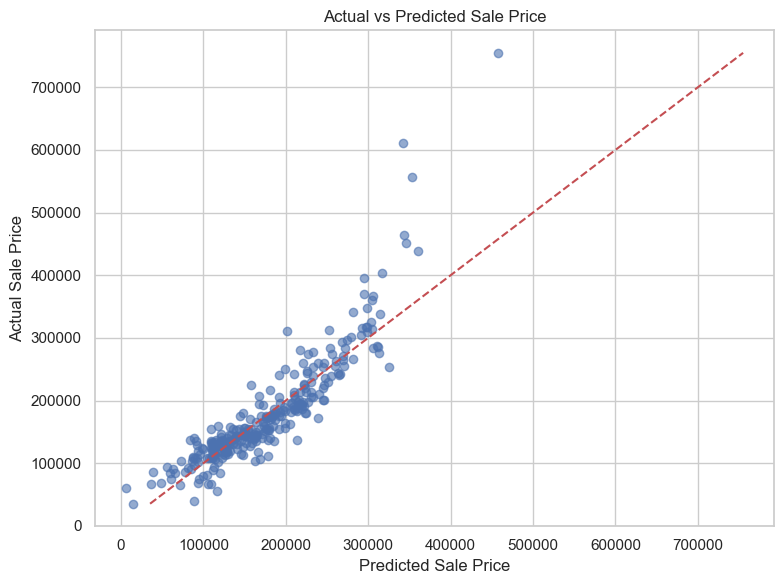

In [12]:
#  Plot: Actual vs Predicted Sale Prices
plt.figure(figsize=(8,6))
plt.scatter(y_pred, y_val, alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel("Predicted Sale Price")
plt.ylabel("Actual Sale Price")
plt.title("Actual vs Predicted Sale Price")
plt.tight_layout()
plt.show()


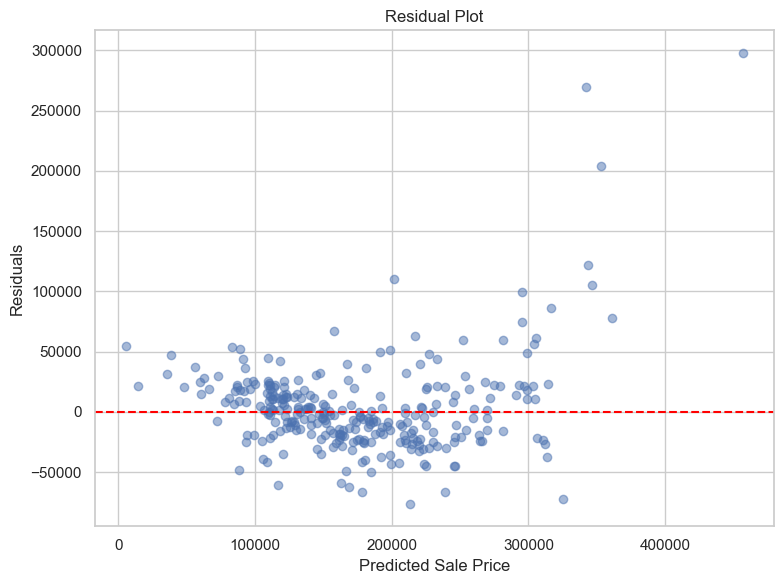

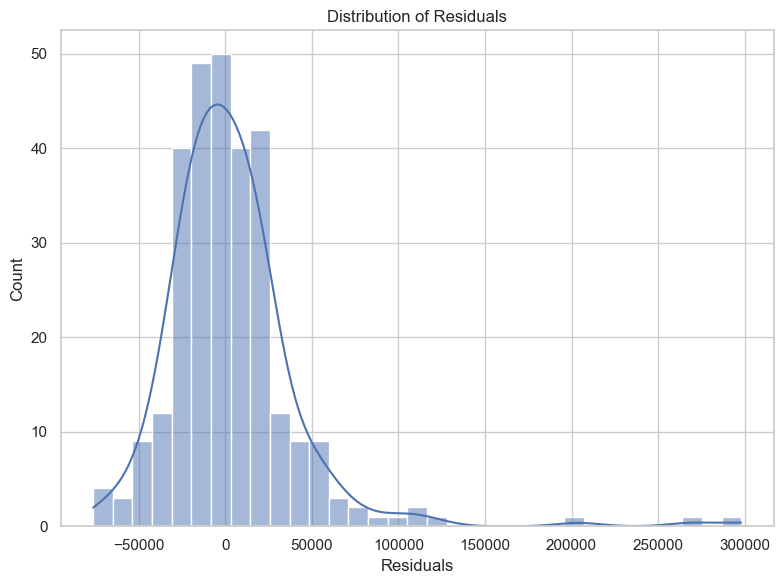

In [13]:
#  Residual Analysis
residuals = y_val - y_pred

# Residual scatter plot
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.tight_layout()
plt.show()

# Residual distribution
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.tight_layout()
plt.show()


In [14]:
#  Display model coefficients to interpret feature impact
coef_df = pd.DataFrame(model.coef_, index=features, columns=['Coefficient'])
print("Linear Regression Coefficients:")
print(coef_df)


Linear Regression Coefficients:
              Coefficient
GrLivArea       49.147654
TotalBsmtSF     23.143091
GarageArea      47.526438
OverallQual  21034.751198
YearBuilt      350.951377
